In [1]:
import pandas as pd

In [2]:
reviews = pd.read_csv("em.csv",encoding='mac_roman')

In [4]:
reviews.head()

,sentiment,review2
0,-2,"Looking at how fast people change, i remind my..."
1,-2,Dimple is not abnormal Pimple too
2,-4,Made it to the hotel alive... ...and deeply c...
3,-1,UNFAITHFUL SU MTVMUSIC
4,-3,RT @Hello_Bella: When his tweets make you moan...


In [5]:
reviews.isnull().values.any()

False

<Axes: xlabel='sentiment', ylabel='count'>

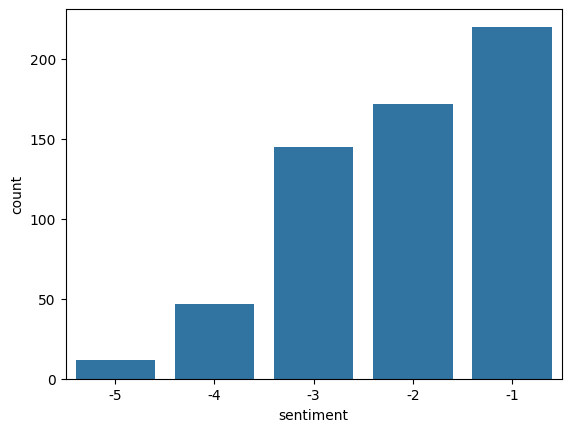

In [6]:
import seaborn as sns
sns.countplot(x='sentiment', data=reviews)

In [7]:
import re
import nltk
from nltk.corpus import stopwords

In [8]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
def preprocess_text(sen):
    sentence = sen.lower()
    sentence = remove_tags(sentence)
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    sentence = re.sub(r'\s+', ' ', sentence)
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)
    return sentence

In [11]:
X = []
sentences = list(reviews['review2'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [12]:
!pip install transformers[torch] pandas datasets pyarrow scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x8

In [13]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [14]:
def process_data(row):
    text = row['review2']
    text = str(text)
    text = ' '.join(text.split())
    label=abs(int(row["sentiment"]))
      # Convert label to integer

    encodings = tokenizer(text, padding="max_length", truncation=True, max_length=128)

    # Use 'labels' key instead of 'label' for PyTorch compatibility
    encodings['labels'] = label
    encodings['text'] = text

    return encodings

In [15]:
print(process_data({
    'review2': 'this is a sample review of a movie.',
    'sentiment': '-5'
}))

{'input_ids': [101, 2023, 2003, 1037, 7099, 3319, 1997, 1037, 3185, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [16]:
processed_data = []

for i in range(len(reviews[:400])):
    processed_data.append(process_data(reviews.iloc[i]))

In [17]:
from sklearn.model_selection import train_test_split

new_df = pd.DataFrame(processed_data)

train_df, valid_df = train_test_split(
    new_df,
    test_size=0.3,
    random_state=2022
)

In [18]:
import pyarrow as pa
from datasets import Dataset

train_hg = Dataset.from_pandas(train_df[['input_ids', 'attention_mask', 'labels', 'text']])
valid_hg = Dataset.from_pandas(valid_df[['input_ids', 'attention_mask', 'labels', 'text']])

In [19]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=6
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./output",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_hg,
    eval_dataset=valid_hg,
    tokenizer=tokenizer,

)

In [21]:
trainer.train()

Step,Training Loss


TrainOutput(global_step=105, training_loss=1.5580968947637648, metrics={'train_runtime': 23.4834, 'train_samples_per_second': 35.77, 'train_steps_per_second': 4.471, 'total_flos': 55255306014720.0, 'train_loss': 1.5580968947637648, 'epoch': 3.0})

In [22]:
trainer.evaluate()

{'eval_loss': 1.3936702013015747,
 'eval_runtime': 0.8757,
 'eval_samples_per_second': 137.036,
 'eval_steps_per_second': 17.13,
 'epoch': 3.0}

In [23]:
model.save_pretrained('./model/')

In [39]:
import torch
from transformers import AutoModelForSequenceClassification

device = torch.device( 'cpu')

new_model = AutoModelForSequenceClassification.from_pretrained('./model/').to(device)

In [40]:
from transformers import AutoTokenizer

new_tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [41]:
import torch
import numpy as np

def get_prediction(text):
    encoding = new_tokenizer(text, return_tensors="pt", padding="max_length", truncation=True, max_length=128)
    encoding = {k: v.to(trainer.model.device) for k,v in encoding.items()}

    outputs = new_model(**encoding)

    logits = outputs.logits
    device = torch.device( 'cpu')
    sigmoid = torch.nn.Sigmoid()
    print(sigmoid)
    probs = sigmoid(logits.squeeze().cpu())
    probs = probs.detach().numpy()
    label = np.argmax(probs, axis=-1)
    print(label)
    if label == 1:

        return {
            'sentiment': "-1",
            'probability': probs[1]
        }
    elif label == 2:
        return {
            'sentiment': "-2",
            'probability': probs[2]
      }
    elif label == 3:
        label=label*100
        return {
            'sentiment': "-3",
            'probability': probs[3]
      }
    elif label == 4:
        label=label*100
        return {
            'sentiment':"-4",
            'probability': probs[4]
      }
    elif label == 5:
        label=label*100
        return {
            'sentiment': "-5",
            'probability': probs[5]
      }

    else:
       pass

In [42]:
df = pd.read_csv('em.csv', encoding='mac_roman')

In [43]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

In [44]:
model.cpu()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [45]:
input_ids = input_ids.to(device)
attention_mask = attention_mask.to(device)
labels = labels.to(device)

In [46]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
import torch
from sklearn.metrics import accuracy_score, classification_report


test_texts = test_df['review2'].tolist()

test_encodings = tokenizer(test_texts, truncation=True, padding=True, return_tensors='pt')

test_labels_tensor = torch.tensor(abs(test_df['sentiment']).tolist(), dtype=torch.long)

test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], test_labels_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model.eval()

all_predictions = []
all_true_labels = []

for batch in test_loader:
    input_ids, attention_mask, labels = batch
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=1).tolist()

    all_predictions.extend(predictions)
    all_true_labels.extend(labels.tolist())

accuracy = accuracy_score(all_true_labels, all_predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.43


In [47]:
print("Classification Report:")
print(classification_report(all_true_labels, all_predictions))

Classification Report:
              precision    recall  f1-score   support

           1       0.38      0.89      0.53        62
           2       0.75      0.19      0.30        48
           3       0.62      0.26      0.37        50
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         4

    accuracy                           0.43       179
   macro avg       0.35      0.27      0.24       179
weighted avg       0.50      0.43      0.37       179



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
get_prediction('wonderfull')

Sigmoid()
1


{'sentiment': '-1', 'probability': 0.6645858}